In [7]:
import os

import h5py
import numpy as np
import edpyt.utils.plotter as pl

In [8]:
# Specify the folder containing the files
data_folder = "output/compute_run/model/nbaths_4_U_4.0/"

# Function to load and display information
def load_and_inspect(file_name):
    print(f"\nInspecting {file_name}:")
    if file_name.endswith(".npy"):
        # Load numpy array
        data = np.load(file_name)
        print(f"Data shape: {data.shape}")
        print(f"Data type: {data.dtype}")

    elif file_name.endswith(".h5"):
        # Load HDF5 file
        with h5py.File(file_name, "r") as f:
            def inspect_h5(group, path=""):
                for key in group.keys():
                    item = group[key]
                    if isinstance(item, h5py.Group):
                        print(f"Group: {path}/{key}")
                        inspect_h5(item, path=f"{path}/{key}")
                    elif isinstance(item, h5py.Dataset):
                        print(f"Dataset: {path}/{key}, shape: {item.shape}, dtype: {item.dtype}")
            inspect_h5(f)

    elif file_name.endswith(".txt"):
        # Load text file
        with open(file_name, "r") as f:
            data = f.read()
            print(f"Content of {file_name}: {data}")

# Loop through all files in the specified folder and inspect each
for file_name in os.listdir(data_folder):
    full_path = os.path.join(data_folder, file_name)
    if os.path.isfile(full_path):
        load_and_inspect(full_path)

    else:
        print(f"Unknown file type for {file_name}. Skipping.")


Inspecting output/compute_run/model/nbaths_4_U_4.0/dmft_delta.npy:
Data shape: (9, 3000)
Data type: complex128

Inspecting output/compute_run/model/nbaths_4_U_4.0/dmft_sigma.npy:
Data shape: (2000, 9, 9)
Data type: complex128

Inspecting output/compute_run/model/nbaths_4_U_4.0/mu.txt:
Content of output/compute_run/model/nbaths_4_U_4.0/mu.txt: 2.0

Inspecting output/compute_run/model/nbaths_4_U_4.0/charge_per_orbital.npy:
Data shape: (9,)
Data type: float64

Inspecting output/compute_run/model/nbaths_4_U_4.0/dmft_gfloc.npy:
Data shape: (9, 2000)
Data type: complex128

Inspecting output/compute_run/model/nbaths_4_U_4.0/charge_per_orbital_dmft.npy:
Data shape: (9,)
Data type: float64

Inspecting output/compute_run/model/nbaths_4_U_4.0/dmft_iterations.h5:
Group: /all_bath_parameters
Group: /all_bath_parameters/iteration_0
Dataset: /all_bath_parameters/iteration_0/ek_0, shape: (3,), dtype: float64
Dataset: /all_bath_parameters/iteration_0/ek_1, shape: (3,), dtype: float64
Dataset: /all_bat

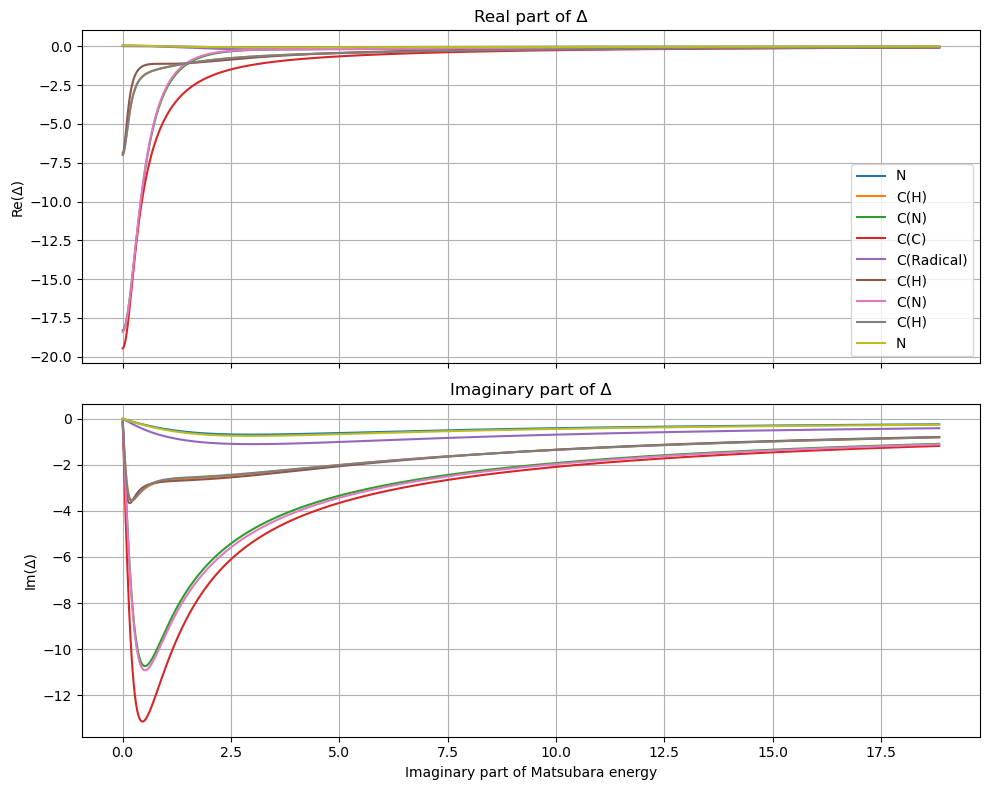

In [9]:
delta = np.load("output/compute_run/model/nbaths_4_U_4.0/dmft_delta.npy")
beta = 1000
ne = 3000
matsubara_energy = 1.0j * (2 * np.arange(ne) + 1) * np.pi / beta
labels = ["N", "C(H)", "C(N)", "C(C)", "C(Radical)", "C(H)", "C(N)", "C(H)", "N"]

pl.plot_delta(delta, matsubara_energy, labels)


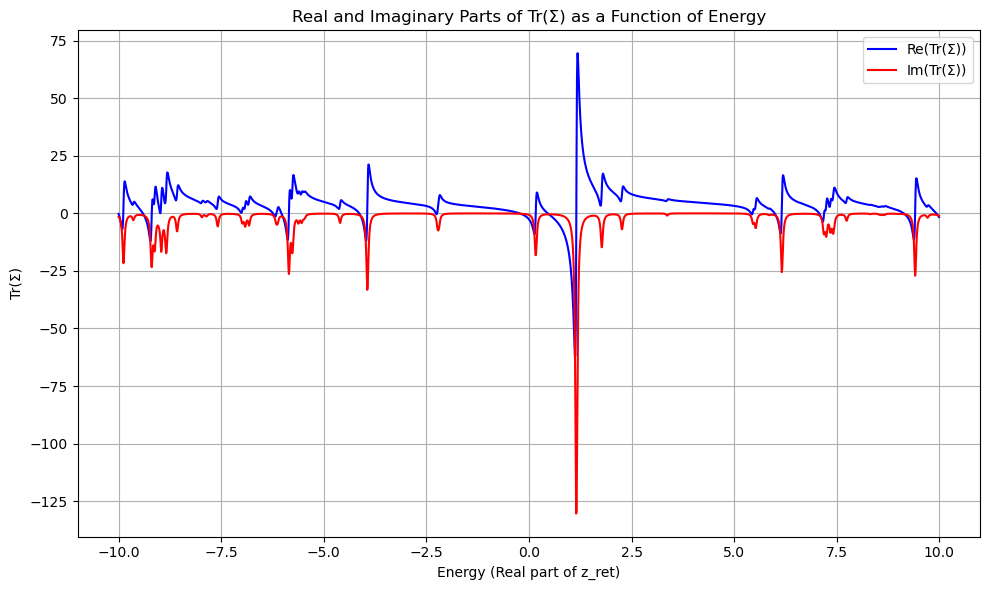

In [10]:
# Load the sigma data and define z_ret
sigmas = np.load("output/compute_run/model/nbaths_4_U_4.0/dmft_sigma.npy")
eta = 3e-2
energies = np.arange(-10, 10, 0.01)
z_ret = energies + 1.0j * eta

# Call the function with loaded data
pl.plot_trace_sigma(sigmas, z_ret)


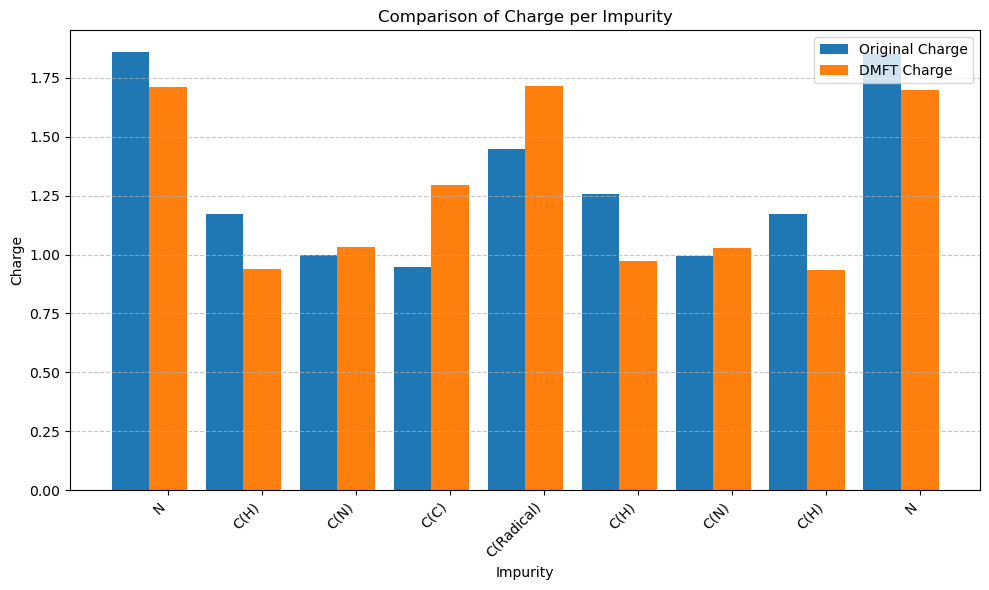

In [11]:
charge_data_1 = np.load("output/compute_run/model/nbaths_4_U_4.0/charge_per_orbital.npy")
charge_data_2 = np.load("output/compute_run/model/nbaths_4_U_4.0/charge_per_orbital_dmft.npy")
labels = ["N", "C(H)", "C(N)", "C(C)", "C(Radical)", "C(H)", "C(N)", "C(H)", "N"]

pl.plot_charge_per_impurity(
    datasets=[charge_data_1, charge_data_2],
    labels=labels,
    dataset_labels=["Original Charge", "DMFT Charge"]
)


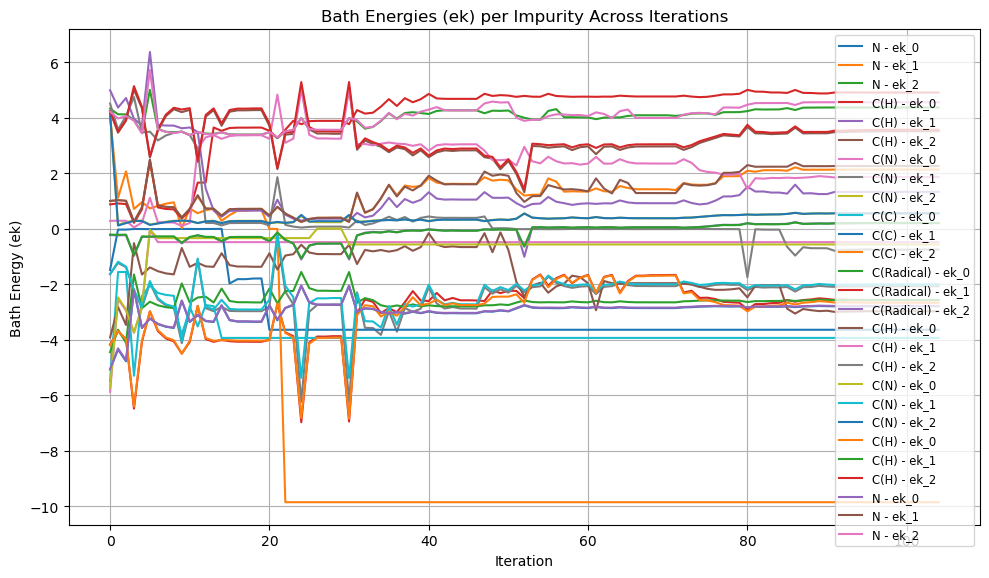

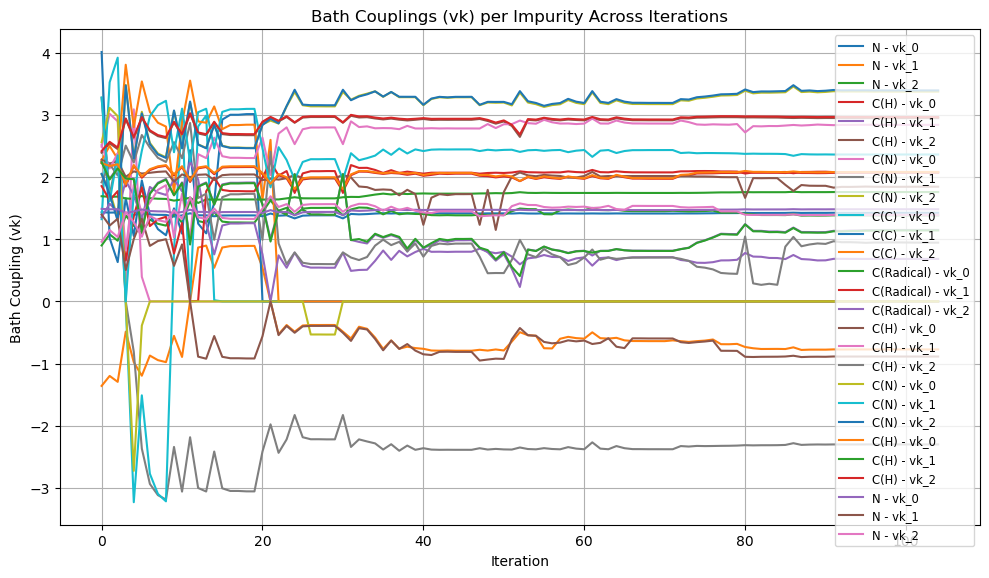

In [12]:
h5_file_path = "output/compute_run/model/nbaths_4_U_4.0/dmft_iterations.h5"

pl.plot_bath_energies(h5_file_path, labels=labels)
pl.plot_bath_couplings(h5_file_path, labels=labels)


/home/anooja/miniconda3/envs/gpaw/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


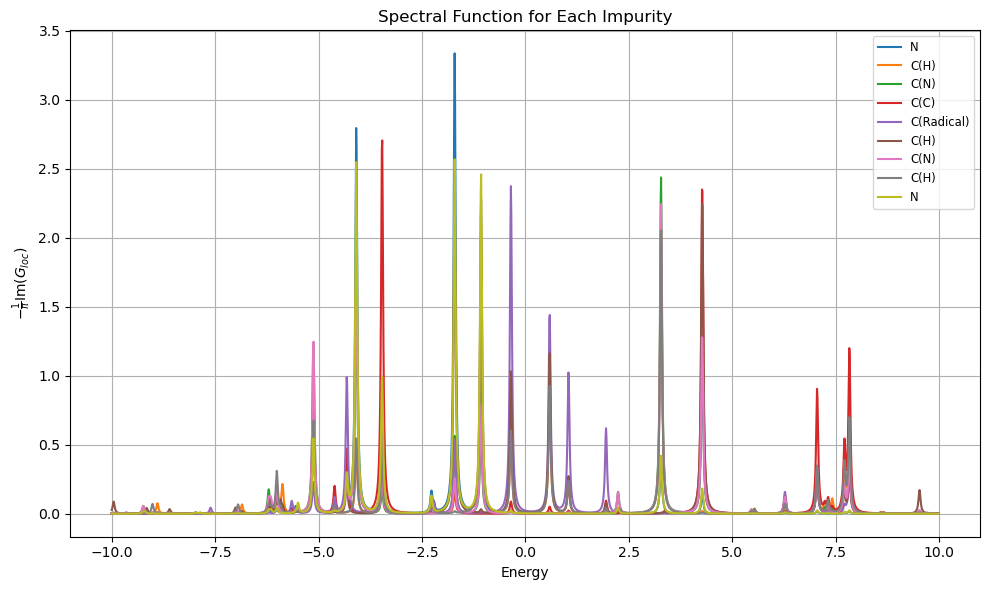

In [13]:
gfloc = np.load("output/compute_run/model/nbaths_4_U_4.0/dmft_gfloc.npy")

pl.plot_gfloc_spectral_function(gfloc, z_ret, labels=labels)
